## Importing libraries

In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

CPU times: total: 1.91 s
Wall time: 3.89 s


## Importing Data

In [2]:
%%time
data = pd.read_csv(r"C:\Users\Pc\OneDrive\Pictures\Data science assignments\week 16\batch88assignments\10. Random Forests\Company_Data.csv")
data.head()

CPU times: total: 0 ns
Wall time: 8.5 ms


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Making a copy of the data

In [3]:
%%time
df = data.copy()
df.head()

CPU times: total: 0 ns
Wall time: 841 µs


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA and Data Preprocessing

In [4]:
%%time
print("The dimension of the DataFrame is,")
df.shape

The dimension of the DataFrame is,
CPU times: total: 0 ns
Wall time: 0 ns


(400, 11)

In [5]:
%%time
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
CPU times: total: 15.6 ms
Wall time: 10.1 ms


In [6]:
%%time
df.describe()

CPU times: total: 31.2 ms
Wall time: 52 ms


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
%%time
df.corr()

CPU times: total: 0 ns
Wall time: 2.49 ms


<timed eval>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [8]:
%%time
print("The skewness of the dataset is as follows - ")
print(df.skew())

The skewness of the dataset is as follows - 
Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64
CPU times: total: 15.6 ms
Wall time: 6.71 ms


<timed exec>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


In [9]:
print("Checking for null values.")
df.isnull().sum()

Checking for null values.


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
%%time
## Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

CPU times: total: 0 ns
Wall time: 4.86 ms


0

In [11]:
%%time
# Show only the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []
CPU times: total: 31.2 ms
Wall time: 5.44 ms


### Interference - There is no duplicated rows in the dataset.

## Graphical Vizualisation

C:\Users\Pc\AppData\Local\Temp\ipykernel_10012\1151504374.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


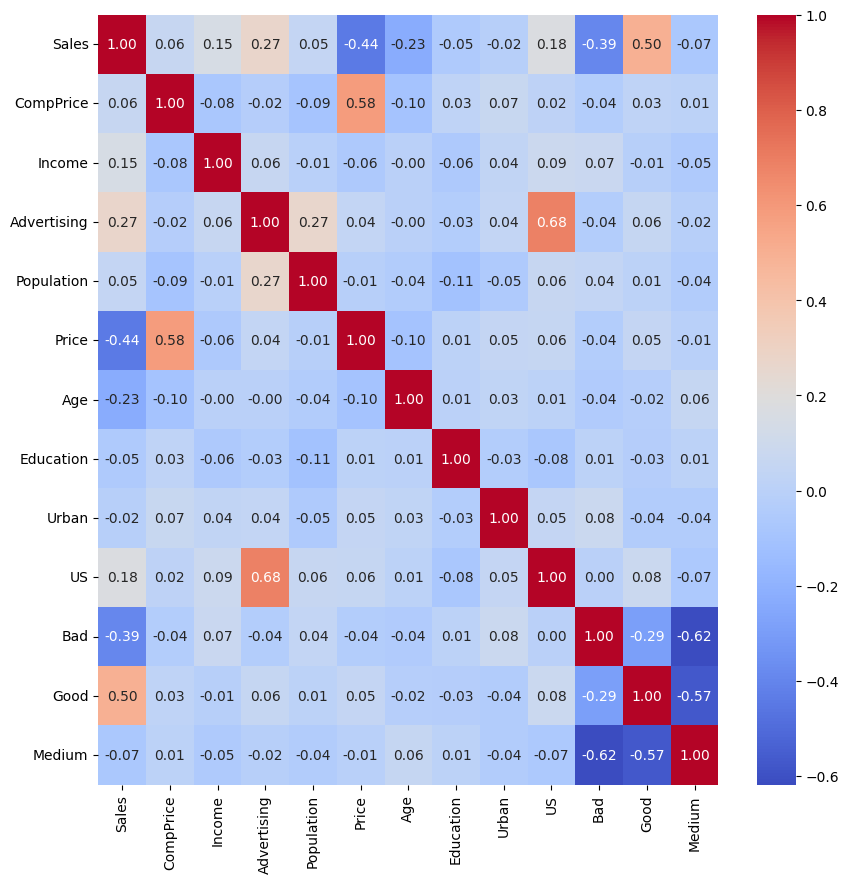

In [39]:
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.savefig("Correlation Matrix.png")
plt.show()

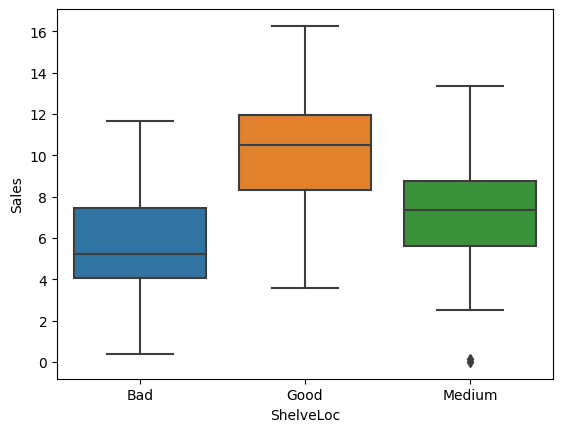

In [32]:
sns.boxplot(x='ShelveLoc', y='Sales', data=df)
plt.savefig("Boxplot.png")
plt.show()

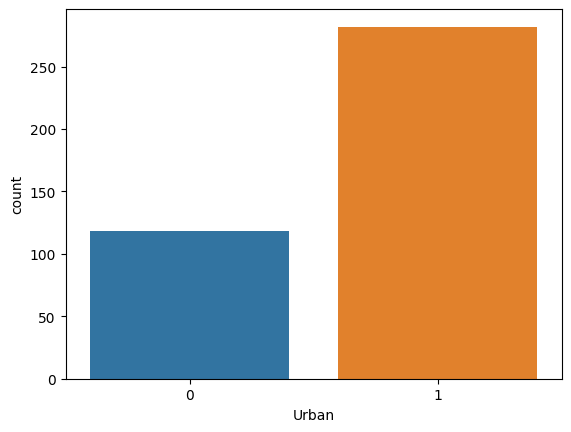

In [33]:
sns.countplot(x='Urban', data=df)
plt.savefig("Count plot.png")
plt.show()

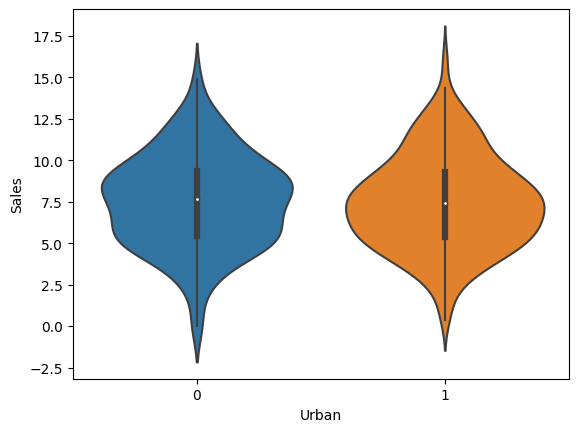

In [34]:
sns.violinplot(x='Urban', y='Sales', data=df)
plt.savefig("Violin plot.png")
plt.show()

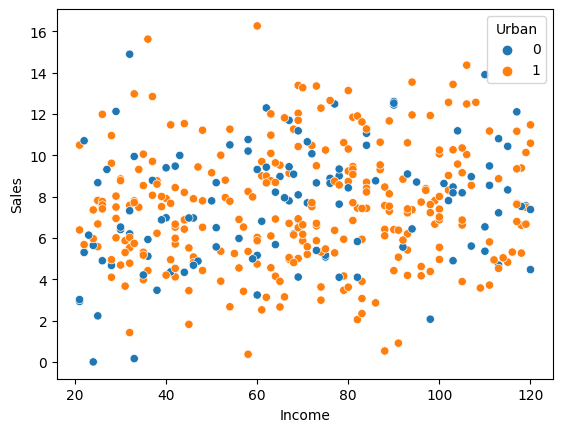

In [35]:
sns.scatterplot(x='Income', y='Sales', data=df, hue='Urban')
plt.savefig("Scatter plot.png")
plt.show()

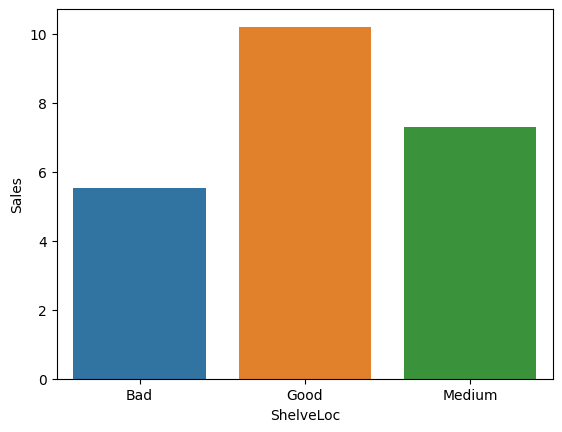

In [36]:
sns.barplot(x='ShelveLoc', y='Sales', data=df, errorbar=None)
plt.savefig("Barplot of ShevLoc.png")
plt.show()

## Insights

In [18]:
### Total sales in thousands
total_sales = round(sum(df['Sales']),2)
print("Total sales is",total_sales,"in thousands.")

Total sales is 2998.53 in thousands.


In [19]:
## Total Community income level
total_income = sum(df['Income'])
print("total income is $",total_income,"k.")

total income is $ 27463 k.


In [20]:
## Total sales in US and Urbsn areas
us_urban = df[(df['Urban']=='Yes') & (df['US']=='Yes')]['Sales'].sum()
print('Total sales in US and Urban areas',us_urban )

Total sales in US and Urban areas 1434.24


In [21]:
## Total cost of advertising
adv_cost = sum(df["Advertising"])
print("Total advertising cost is $",adv_cost,"k.")

Total advertising cost is $ 2654 k.


In [22]:
## Total advertsiement cost in US
us_adv = df.groupby('US')['Advertising'].sum()
print('Total advertising cost in US(in thousands)' )
us_adv

Total advertising cost in US(in thousands)


US
No       72
Yes    2582
Name: Advertising, dtype: int64

## Preparing data for Training

In [23]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
## Replacing Yes to 1 and No to 0 in the Urban and US columns
df['Urban']=df['Urban'].replace({'Yes':1, 'No':0})
df['US']=df['US'].replace({'Yes':1, 'No':0})

In [25]:
dumm = pd.get_dummies(df['ShelveLoc'])
dumm.head()

,Bad,Good,Medium
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0


In [26]:
df = pd.concat([df,dumm], axis = 1)
df.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Bad,Good,Medium
0,9.5,138,73,11,276,120,Bad,42,17,1,1,1,0,0


In [27]:
mean_sales = df['Sales'].mean()
mean_sales

7.496325000000001

In [28]:
df['Sales_measure'] = df['Sales'].apply(lambda x : 'Low' if x <= 7.5 else  'High')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Bad,Good,Medium,Sales_measure
0,9.50,138,73,11,276,120,Bad,42,17,1,1,1,0,0,High
1,11.22,111,48,16,260,83,Good,65,10,1,1,0,1,0,High
2,10.06,113,35,10,269,80,Medium,59,12,1,1,0,0,1,High
3,7.40,117,100,4,466,97,Medium,55,14,1,1,0,0,1,Low
4,4.15,141,64,3,340,128,Bad,38,13,1,0,1,0,0,Low


## Saving the DataFrame

In [29]:
csv_file_path = 'Company_data_cleaned.csv'
df.to_csv(csv_file_path, index=False)